In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

In [2]:
repre = pd.read_csv(f'{Project}/Results/Tables/conversion_tables/representative-isoforms.txt', sep='\t', usecols=[0,1], header=None, names=['gene_id','transcript_id'])
repre['gene_id'] = repre['gene_id'].str.split('.').str[0]
repre['transcript_id'] = repre['transcript_id'].str.split('.').str[0]
display(repre)

T2G = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GTF_parsed/v0.7.1/gencode.vM27.annotation.gtf/Processed_gtf.tsv', sep='\t', usecols=['Gene_ID','Transcript_ID'])
T2G = T2G.rename(columns={'Gene_ID':'gene_id','Transcript_ID':'transcript_id'})
T2G['gene_id'] = T2G['gene_id'].str.split('.').str[0]
T2G['transcript_id'] = T2G['transcript_id'].str.split('.').str[0]
display(T2G)

full_name = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2022.1.Mm.chip', sep='\t')
full_name = full_name.rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'gene_name', 'Gene Title':'full_name'})
full_name['full_name'] = full_name['full_name'].str.split('[').str[0]

display(full_name)

,gene_id,transcript_id
0,ENSMUSG00000000001,ENSMUST00000000001
1,ENSMUSG00000000003,ENSMUST00000000003
2,ENSMUSG00000000028,ENSMUST00000000028
3,ENSMUSG00000000031,ENSMUST00000136359
4,ENSMUSG00000000037,ENSMUST00000019101
...,...,...
55354,ENSMUSG00002076988,ENSMUST00020182589
55355,ENSMUSG00002076989,ENSMUST00000083836
55356,ENSMUSG00002076990,ENSMUST00020183326
55357,ENSMUSG00002076991,ENSMUST00020182837


,transcript_id,gene_id
0,ENSMUST00000193812,ENSMUSG00000102693
1,ENSMUST00000082908,ENSMUSG00000064842
2,ENSMUST00000162897,ENSMUSG00000051951
3,ENSMUST00000159265,ENSMUSG00000051951
4,ENSMUST00000070533,ENSMUSG00000051951
...,...,...
142369,ENSMUST00000082418,ENSMUSG00000064367
142370,ENSMUST00000082419,ENSMUSG00000064368
142371,ENSMUST00000082420,ENSMUSG00000064369
142372,ENSMUST00000082421,ENSMUSG00000064370


,gene_id,gene_name,full_name
0,ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...
1,ENSMUSG00000000003,Pbsn,probasin
2,ENSMUSG00000000028,Cdc45,cell division cycle 45
3,ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript"
4,ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2
...,...,...,...
43242,ENSMUSG00002076818,SNORD14,Small nucleolar RNA SNORD14
43243,ENSMUSG00002076971,Snord100,"small nucleolar RNA, C/D box 100"
43244,ENSMUSG00002076975,Gm23823,"predicted gene, 23823"
43245,ENSMUSG00002076989,Gm23510,"predicted gene, 23510"


In [3]:
stabl = pd.read_csv(f'{Project}/Results/Tables/Intron_RNA_change/REMBRANDTS/out/v20230815/stability.filtered.mx.txt', sep='\t').rename(columns={'GeneID':'gene_id'})
# display(stabl)

stabl['D0'] = stabl[['D0a','D0b','D0c']].mean(axis=1)
for SP in [day+rep for day in ['D0','D4','D8'] for rep in ['a','b','c']]:
    stabl[SP] = stabl[SP] - stabl['D0']
stabl = stabl.drop(columns='D0')
# display(stabl)

avg_stabl = stabl[['gene_id']].copy()
for day in ['D0','D4','D8']:
    avg_stabl[day] = stabl[[day+rep for rep in ['a','b','c']]].mean(axis=1)
avg_stabl = avg_stabl[['gene_id','D4','D8']].rename(columns={'D4':'S4', 'D8':'S8'})
avg_stabl = pd.merge(full_name, avg_stabl, on='gene_id', how='right')
display(avg_stabl)

,gene_id,gene_name,full_name,S4,S8
0,ENSMUSG00000000058,Cav2,caveolin 2,0.288815,0.912689
1,ENSMUSG00000000088,Cox5a,cytochrome c oxidase subunit 5A,-0.229405,0.344774
2,ENSMUSG00000000131,Xpo6,exportin 6,-0.188012,-0.242323
3,ENSMUSG00000000134,Tfe3,transcription factor E3,-0.125844,-0.209755
4,ENSMUSG00000000148,Brat1,BRCA1-associated ATM activator 1,-0.192310,-0.475821
...,...,...,...,...,...
4638,ENSMUSG00000118346,Tmem179b,transmembrane protein 179B,0.418344,0.606414
4639,ENSMUSG00000121301,NaN,NaN,-0.349892,-0.462991
4640,ENSMUSG00000121493,NaN,NaN,0.186162,0.011664
4641,ENSMUSG00000121504,NaN,NaN,-0.533011,-0.266911


In [4]:
TargetScanM = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/TargetScan/Mouse/Summary_Counts.default_predictions.txt', sep='\t')
TargetScanM = TargetScanM[TargetScanM['Representative miRNA'].str.startswith('mmu')]
TargetScanM['Representative miRNA'] = TargetScanM['Representative miRNA'].str.split('-').str[1] + '-' + TargetScanM['Representative miRNA'].str.split('-').str[2]

cut = 0.4
TargetScanM = TargetScanM[TargetScanM['Aggregate PCT']>cut]

TargetScanM = TargetScanM.rename(columns={'Transcript ID':'transcript_id'})
TargetScanM['transcript_id'] = TargetScanM['transcript_id'].str.split('.').str[0]
TargetScanM = pd.merge(T2G, TargetScanM, on='transcript_id')

display(TargetScanM)

TargetScanM_stb = TargetScanM[['gene_id','Representative miRNA','Aggregate PCT']]
TargetScanM_stb = pd.merge(avg_stabl, TargetScanM_stb, on='gene_id')
display(TargetScanM_stb)

,transcript_id,gene_id,Gene Symbol,miRNA family,Species ID,Total num conserved sites,Number of conserved 8mer sites,Number of conserved 7mer-m8 sites,Number of conserved 7mer-1a sites,Total num nonconserved sites,Number of nonconserved 8mer sites,Number of nonconserved 7mer-m8 sites,Number of nonconserved 7mer-1a sites,Number of 6mer sites,Representative miRNA,Total context++ score,Cumulative weighted context++ score,Aggregate PCT
0,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,UUGGCAC,10090,1,1,0,0,0,0,0,0,0,miR-96,-0.482,-0.482,0.902
1,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,AGCACCA,10090,1,0,1,0,0,0,0,0,0,miR-29a,-0.369,-0.369,0.802
2,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,UUGGCAA,10090,1,0,0,1,0,0,0,0,0,miR-182,-0.232,-0.232,0.698
3,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,UAUUGCU,10090,1,0,0,1,0,0,0,0,0,miR-137,-0.079,-0.079,0.691
4,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,UGGCACU,10090,1,1,0,0,0,0,0,0,1,miR-183,-0.533,-0.533,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33363,ENSMUST00000091190,ENSMUSG00000069045,Ddx3y,AGCACCA,10090,1,0,0,1,1,0,0,1,0,miR-29a,-0.394,-0.326,0.755
33364,ENSMUST00000091190,ENSMUSG00000069045,Ddx3y,AUUGCAC,10090,1,1,0,0,0,0,0,0,0,miR-367,-0.338,-0.280,0.744
33365,ENSMUST00000091190,ENSMUSG00000069045,Ddx3y,GUGCAAA,10090,2,1,0,1,0,0,0,0,0,miR-19a,-0.466,-0.383,0.741
33366,ENSMUST00000091190,ENSMUSG00000069045,Ddx3y,UUGGUCC,10090,1,0,0,1,0,0,0,0,0,miR-133a,-0.144,-0.121,0.595


,gene_id,gene_name,full_name,S4,S8,Representative miRNA,Aggregate PCT
0,ENSMUSG00000000058,Cav2,caveolin 2,0.288815,0.912689,miR-29b,0.824
1,ENSMUSG00000000058,Cav2,caveolin 2,0.288815,0.912689,miR-23b,0.494
2,ENSMUSG00000000088,Cox5a,cytochrome c oxidase subunit 5A,-0.229405,0.344774,miR-26a,0.629
3,ENSMUSG00000000088,Cox5a,cytochrome c oxidase subunit 5A,-0.229405,0.344774,miR-204,0.595
4,ENSMUSG00000000131,Xpo6,exportin 6,-0.188012,-0.242323,miR-1a,0.930
...,...,...,...,...,...,...,...
9771,ENSMUSG00000096199,Ptrhd1,peptidyl-tRNA hydrolase domain containing 1,0.169379,-0.093638,miR-181a,0.464
9772,ENSMUSG00000099083,Atf7,activating transcription factor 7,-0.267360,-0.443848,miR-142a,0.669
9773,ENSMUSG00000099083,Atf7,activating transcription factor 7,-0.267360,-0.443848,miR-7a,0.481
9774,ENSMUSG00000106864,Gtf3c2,"general transcription factor IIIC, polypeptide...",0.097057,-0.104997,miR-26a,0.630


In [5]:
TargetScanM_stb2 = TargetScanM_stb.copy()
TargetScanM_stb2 = TargetScanM_stb2.replace('miR-26a','miR-26').replace('miR-26b','miR-26')
TargetScanM_stb2 = TargetScanM_stb2.replace('miR-30b','miR-30b/c').replace('miR-30c','miR-30b/c')
TargetScanM_stb2 = TargetScanM_stb2.replace('miR-125a','miR-125').replace('miR-125b','miR-125')
TargetScanM_stb2 = TargetScanM_stb2.replace(['miR-133'+a for a in ['a','b','c']],'miR-133')
TargetScanM_stb2 = TargetScanM_stb2.replace(['let-7'+a for a in ['a','b','c','d','e','f','g','h','i','j','k']],'let-7')

display(TargetScanM_stb2)

promote_miR = ['miR-365','miR-182','miR-203','miR-129','miR-30b/c','miR-32','miR-455','miR-196a','miR-26','let-7'] # 'miR-193b','miR-328'
inhibit_miR = ['miR-106b','miR-93','miR-34a','miR-155','miR-133','miR-27b','miR-125']

,gene_id,gene_name,full_name,S4,S8,Representative miRNA,Aggregate PCT
0,ENSMUSG00000000058,Cav2,caveolin 2,0.288815,0.912689,miR-29b,0.824
1,ENSMUSG00000000058,Cav2,caveolin 2,0.288815,0.912689,miR-23b,0.494
2,ENSMUSG00000000088,Cox5a,cytochrome c oxidase subunit 5A,-0.229405,0.344774,miR-26,0.629
3,ENSMUSG00000000088,Cox5a,cytochrome c oxidase subunit 5A,-0.229405,0.344774,miR-204,0.595
4,ENSMUSG00000000131,Xpo6,exportin 6,-0.188012,-0.242323,miR-1a,0.930
...,...,...,...,...,...,...,...
9771,ENSMUSG00000096199,Ptrhd1,peptidyl-tRNA hydrolase domain containing 1,0.169379,-0.093638,miR-181a,0.464
9772,ENSMUSG00000099083,Atf7,activating transcription factor 7,-0.267360,-0.443848,miR-142a,0.669
9773,ENSMUSG00000099083,Atf7,activating transcription factor 7,-0.267360,-0.443848,miR-7a,0.481
9774,ENSMUSG00000106864,Gtf3c2,"general transcription factor IIIC, polypeptide...",0.097057,-0.104997,miR-26,0.630


In [6]:
target_num_cut = 80
promote_miR_pass = []
inhibit_miR_pass = []

for miR in promote_miR:
    tmp = TargetScanM_stb2[TargetScanM_stb2['Representative miRNA']==miR]
    if len(tmp) < target_num_cut : continue
    promote_miR_pass.append(miR)

for miR in inhibit_miR:
    tmp = TargetScanM_stb2[TargetScanM_stb2['Representative miRNA']==miR]
    if len(tmp) < target_num_cut : continue
    inhibit_miR_pass.append(miR)

display(promote_miR_pass)
display(inhibit_miR_pass)

['miR-182', 'miR-129', 'miR-30b/c', 'miR-455', 'miR-26', 'let-7']

['miR-106b', 'miR-133', 'miR-125']

In [7]:
def cumul_curve(ax, df, col, c, lw, label):
    df = df[[col]]
    df = df.sort_values(col).dropna()
    df['rank'] = [*range(len(df))]
    df['frac'] = df['rank'] / (len(df)-1)
    
    ax.plot(df[col], df['frac'], color=c, linewidth=lw, label=label)

In [8]:
promote_miR_data = pd.merge(TargetScanM_stb2, pd.DataFrame({'Representative miRNA':promote_miR}), on='Representative miRNA')
promote_miR_data = promote_miR_data.drop(columns=['Representative miRNA','Aggregate PCT']).drop_duplicates()
display(promote_miR_data)

inhibit_miR_data = pd.merge(TargetScanM_stb2, pd.DataFrame({'Representative miRNA':inhibit_miR}), on='Representative miRNA')
inhibit_miR_data = inhibit_miR_data.drop(columns=['Representative miRNA','Aggregate PCT']).drop_duplicates()
display(inhibit_miR_data)

,gene_id,gene_name,full_name,S4,S8
0,ENSMUSG00000000088,Cox5a,cytochrome c oxidase subunit 5A,-0.229405,0.344774
1,ENSMUSG00000000184,Ccnd2,cyclin D2,-0.081681,-1.014505
2,ENSMUSG00000000957,Mmp14,matrix metallopeptidase 14 (membrane-inserted),-0.117245,-2.067344
3,ENSMUSG00000001467,Cyp51,"cytochrome P450, family 51",1.727630,-0.481903
4,ENSMUSG00000001870,Ltbp1,latent transforming growth factor beta binding...,-1.245933,-1.532437
...,...,...,...,...,...
1086,ENSMUSG00000037791,Phf12,PHD finger protein 12,0.030843,-0.355613
1087,ENSMUSG00000038145,Snrk,SNF related kinase,0.725076,1.436377
1091,ENSMUSG00000054823,Nsd3,nuclear receptor binding SET domain protein 3,-0.679277,-0.570501
1092,ENSMUSG00000058571,Gpc6,glypican 6,-1.011875,-1.324003


,gene_id,gene_name,full_name,S4,S8
0,ENSMUSG00000000134,Tfe3,transcription factor E3,-0.125844,-0.209755
1,ENSMUSG00000000552,Zfp385a,zinc finger protein 385A,0.187467,0.333569
3,ENSMUSG00000001248,Gramd1a,GRAM domain containing 1A,0.177051,0.315243
4,ENSMUSG00000001288,Rarg,"retinoic acid receptor, gamma",-0.739198,-2.035955
5,ENSMUSG00000001870,Ltbp1,latent transforming growth factor beta binding...,-1.245933,-1.532437
...,...,...,...,...,...
568,ENSMUSG00000042747,Krtcap2,keratinocyte associated protein 2,-0.416828,-0.198852
569,ENSMUSG00000050737,Ptges,prostaglandin E synthase,0.797756,0.714985
570,ENSMUSG00000051391,Ywhag,tyrosine 3-monooxygenase/tryptophan 5-monooxyg...,0.141393,0.315698
571,ENSMUSG00000052609,Plekhg3,"pleckstrin homology domain containing, family ...",0.009014,-0.308273


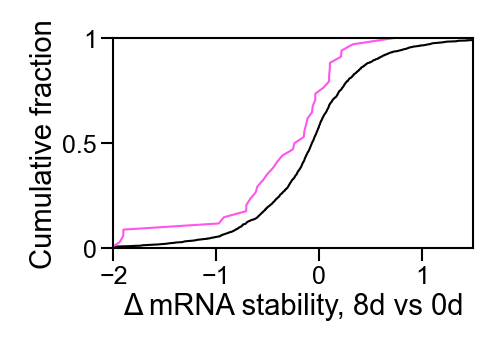

In [17]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1.2]
height_ratios = [0.7]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

cumul_curve(ax, TargetScanM_stb.drop_duplicates(subset='gene_id'),  'S8', '#000000',  0.5, 'All miRNAs')
# cumul_curve(ax, promote_miR_data,  'S8', '#D55E00',  0.5, 'miRNAs promoting browning')
# cumul_curve(ax, inhibit_miR_data,  'S8', 'orangered',  0.5, miR)

# cumul_curve(ax, TargetScanM_stb2[TargetScanM_stb2['Representative miRNA']=='miR-30b/c'],  'S8', '#AA0DB4',  0.5, 'miR-30b/c')
cumul_curve(ax, TargetScanM_stb2[TargetScanM_stb2['Representative miRNA']=='miR-196a'],  'S8', '#FF54ED',  0.5, 'miR-196a')

ax.set_xlim(-2, 1.5)
ax.set_ylim(0,1)
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
ax.tick_params(length=3, width=0.5, pad=1)

ax.set_xlabel('\u0394 mRNA stability, 8d vs 0d', labelpad=1)
ax.set_ylabel('Cumulative fraction', labelpad=1)


from scipy.stats import mannwhitneyu

# stat, pV = mannwhitneyu(TargetScanM_stb2[TargetScanM_stb2['Representative miRNA']=='miR-196a']['S8'],
#                         TargetScanM_stb.drop_duplicates(subset='gene_id')['S8'])
# ax.text(-1.9, 0.93, f'p={pV:.2f}', horizontalalignment='left', verticalalignment='center', fontsize=7)

# ax.legend(loc='lower right', bbox_to_anchor=(1.05,-0.05), title='Targets of', fontsize=7, frameon=False)

plt.savefig('miRNA-target_stabl-cumulative.pdf', bbox_inches='tight')
plt.show()
plt.close()